In [1]:
import os
import pandas as pd
import numpy as np

#Series as dictionary

In [4]:
data = pd.Series([1,2,3,4],
                index = list('abcd'))
data

a    1
b    2
c    3
d    4
dtype: int64

In [5]:
data['b']

2

In [ ]:
'a' in data

True

In [ ]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
list(data.items())

[('a', 1), ('b', 2), ('c', 3), ('d', 4)]

In [ ]:
data['e'] = 1.25
data

a    1.00
b    2.00
c    3.00
d    4.00
e    1.25
dtype: float64

#Series as one-dimensional array

In [ ]:
# slicing by explicit index
data['a':'c']

a    1.0
b    2.0
c    3.0
dtype: float64

In [ ]:
# slicing by impllicit integer index
data[0:2]

a    1.0
b    2.0
dtype: float64

In [ ]:
# masking
data[(data > 0.3 ) & (data < 3)]

a    1.00
b    2.00
e    1.25
dtype: float64

In [ ]:
# fancy indexing
data[['a','e']]

a    1.00
e    1.25
dtype: float64

#indexers : loc, iloc, and ix

In [ ]:
data = pd.Series(['a','b','c'],index = [1,3,5])
data

1    a
3    b
5    c
dtype: object

In [ ]:
# explicit index when indexing
data[1]

'a'

In [ ]:
# implitcit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [ ]:
data.loc[1]

'a'

In [ ]:
data.loc[1:3]

1    a
3    b
dtype: object

In [ ]:
data.iloc[1]

'b'

In [ ]:
data.iloc[1:3]

3    b
5    c
dtype: object

#Data Selection in DataFrame

In [ ]:
#DataFrame as a dictionary
area = pd.Series({'California': 423967, 'Texas': 695662,
 'New York': 141297, 'Florida': 170312,
 'Illinois': 149995})

pop = pd.Series({'California': 38332521, 'Texas': 26448193,
 'New York': 19651127, 'Florida': 19552860,
 'Illinois': 12882135})

data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
data.area is data['area']

True

In [ ]:
data.pop is data['pop']

False

In [ ]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
# DataFrame as two-dimensional array
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [ ]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [ ]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [ ]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
data.iloc[:3,:2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [ ]:
data.loc[:"Illinois","pop"]

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: pop, dtype: int64

In [ ]:
#data.ix[:3, :'pop']

In [ ]:
data.loc[data.density > 100,['pop','density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [ ]:
data.iloc[0,2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#Additional indexing conventions

In [ ]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
# slices can also refer to rows by number rather than by index:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [ ]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


# ☝**Operating on Data in Pandas**

# Ufuncs: Index Preservation

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [ ]:
df = pd.DataFrame(rng.randint(0,10,(3,4)),
                  columns=list("ABCD"))
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [ ]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [ ]:
np.sin(df*np.pi /4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


# UFuncs: Index Alignment

In [ ]:
# Index alignment in Series
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                'California': 423967}, name='area')

population = pd.Series({'California': 38332521, 'Texas': 26448193,
                'New York': 19651127}, name='population')
area

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64

In [ ]:
population

California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64

In [ ]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [ ]:
area.index | population.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  """Entry point for launching an IPython kernel.


Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [ ]:
 A = pd.Series([2, 4, 6], index=[0, 1, 2])
 B = pd.Series([1, 3, 5], index=[1, 2, 3])
A

0    2
1    4
2    6
dtype: int64

In [ ]:
B

1    1
2    3
3    5
dtype: int64

In [ ]:
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [ ]:
A.add(B,fill_value = 0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [ ]:
# Index Alignment in DataFrame
A = pd.DataFrame(rng.randint(0,20,(2,2)),
                 columns = list('AB'))
A

,A,B
0,1,11
1,5,1


In [ ]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [ ]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [ ]:
fill = A.stack().mean()
A.add(B,fill_value= fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


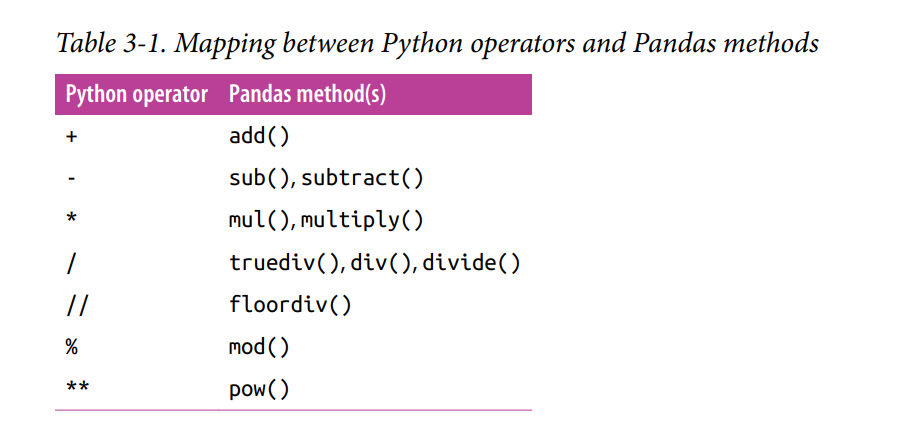

# Ufuncs: Operations Between DataFrame and Series

In [ ]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [ ]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [ ]:
df = pd.DataFrame(A,columns = list('QRST'))
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [ ]:
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [ ]:
df.subtract(df['R'],axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [ ]:
halfrow = df.iloc[0,::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [ ]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


# Missing Data in Pandas

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
vals1 = np.array([1,None,3,4])
vals1

array([1, None, 3, 4], dtype=object)

In [ ]:
for dtype in ['object','int']:
    print('dtype',dtype)
    %timeit np.arange(1E6,dtype=dtype).sum()
    print()

dtype object
10 loops, best of 5: 66.6 ms per loop

dtype int
100 loops, best of 5: 2.07 ms per loop



In [ ]:
#vals1.sum()

In [ ]:
# NaN: Missing numerical data
vals2 = np.array([1,np.nan,3,4])
vals2.dtype

dtype('float64')

In [ ]:
1 + np.nan

nan

In [ ]:
0 * np.nan

nan

In [ ]:
vals2.sum(),vals2.min(),vals2.max()

(nan, nan, nan)

In [ ]:
np.nansum(vals2),np.nanmin(vals2),np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [ ]:
# NaN and None in Pandas
x = pd.Series(range(2),dtype=int)
x

0    0
1    1
dtype: int64

In [ ]:
x[0] = None
x 

0    NaN
1    1.0
dtype: float64

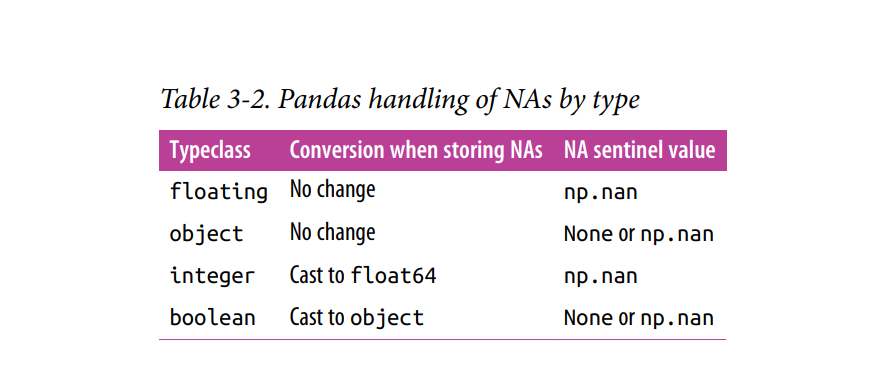

In [ ]:
# Operating on Null Values

In [ ]:
# Detecting null values
data = pd.Series([1,np.nan,'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [ ]:
# Dropping null values
data.dropna()

0        1
2    hello
dtype: object

In [ ]:
df = pd.DataFrame([[1, np.nan, 2],
                    [2, 3, 5],
                    [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [ ]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.dropna(axis='columns',how = 'all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
df.dropna(axis='rows',thresh = 3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [ ]:
# Filling nul values
data = pd.Series([1,np.nan,2,None,3],index = list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [ ]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [ ]:
# forward - fill
data.fillna(method = 'ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [ ]:
data.fillna(method = 'bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [ ]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.fillna(method = 'ffill',axis=0)

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [ ]:
df.fillna(method = 'ffill',axis= 1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# Hierarchical Indexing

In [ ]:
import pandas as pd
import numpy as np

# A Multiply Indexed Series

In [ ]:
index = [('California', 2000), ('California', 2010),
            ('New York', 2000), ('New York', 2010),
            ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
            18976457, 19378102,
            20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [ ]:
pop[('California',2010):('Texas',2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [ ]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [ ]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [ ]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
pop[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [ ]:
# MultiIndex as extra dimension
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [ ]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
pop_df = pd.DataFrame({'total':pop,
                       'under18':[9267089,9284094,
                                  4687374,4318033,
                                  5906301,6879014]
})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [ ]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


# Methods of MultiIndex Creation

In [ ]:
df = pd.DataFrame(np.random.rand(4,2),
                  index=[['a','a','b','b'],[1,2,1,2]],
                    columns = ['data1','data2'])
df

data1     data2
a 1  0.936229  0.884674
  2  0.177635  0.842063
b 1  0.406171  0.485404
  2  0.784478  0.462917

In [ ]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

# Explicit MultiIndex constructors

In [ ]:
pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
pd.MultiIndex.from_product([['a','b'],[1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

# MultiIndex level names

In [ ]:
pop.index.names = ['state','year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# MultiIndex for columns

In [ ]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[20,13,2014],[1,2]],
                                   names=['year','visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                names=['subject', 'type'])
index

MultiIndex([(  20, 1),
            (  20, 2),
            (  13, 1),
            (  13, 2),
            (2014, 1),
            (2014, 2)],
           names=['year', 'visit'])

In [ ]:
columns

MultiIndex([(  'Bob',   'HR'),
            (  'Bob', 'Temp'),
            ('Guido',   'HR'),
            ('Guido', 'Temp'),
            (  'Sue',   'HR'),
            (  'Sue', 'Temp')],
           names=['subject', 'type'])

In [ ]:
# mock some data
data = np.round(np.random.randn(6,6),1)
data[:,::2] += 10
data += 37

In [ ]:
# create the DataFrame
health_data = pd.DataFrame(data, index=index,columns = columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
20   1      46.1  37.1  47.8  36.1  47.0  36.2
     2      47.2  37.3  45.6  38.6  43.3  36.1
13   1      47.4  38.1  45.5  36.7  48.0  36.8
     2      47.8  37.3  47.5  36.5  46.3  34.7
2014 1      48.5  37.1  46.5  36.9  47.1  36.3
     2      46.0  36.8  47.9  38.6  45.6  36.5

In [ ]:
health_data['Guido']

type          HR  Temp
year visit            
20   1      47.8  36.1
     2      45.6  38.6
13   1      45.5  36.7
     2      47.5  36.5
2014 1      46.5  36.9
     2      47.9  38.6

# Indexing and Slicing a MultiIndex

In [ ]:
# Multiply indexed Series
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
pop['California',2000]

33871648

In [ ]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [ ]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [ ]:
pop[:,2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [ ]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [ ]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

# Multiply indexed DataFrames

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
20   1      46.1  37.1  47.8  36.1  47.0  36.2
     2      47.2  37.3  45.6  38.6  43.3  36.1
13   1      47.4  38.1  45.5  36.7  48.0  36.8
     2      47.8  37.3  47.5  36.5  46.3  34.7
2014 1      48.5  37.1  46.5  36.9  47.1  36.3
     2      46.0  36.8  47.9  38.6  45.6  36.5

In [ ]:
health_data['Guido','HR']

year  visit
20    1        47.8
      2        45.6
13    1        45.5
      2        47.5
2014  1        46.5
      2        47.9
Name: (Guido, HR), dtype: float64

In [ ]:
health_data.iloc[:2,:2]

subject      Bob      
type          HR  Temp
year visit            
20   1      46.1  37.1
     2      47.2  37.3

In [ ]:
health_data.loc[:,('Bob','HR')]

year  visit
20    1        46.1
      2        47.2
13    1        47.4
      2        47.8
2014  1        48.5
      2        46.0
Name: (Bob, HR), dtype: float64

In [ ]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
20,1,46.1,47.8,47.0
13,1,47.4,45.5,48.0
2014,1,48.5,46.5,47.1


# Stacking and unstacking indices

In [ ]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [ ]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [ ]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

# Index setting and resetting

In [ ]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [ ]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

# Combining Datasets : Merge and Join

In [ ]:
# Relational Algebra
df1 = pd.DataFrame({'employee' : ['Bob','Jake','Lisa','Sue'],
                    'group': ['Accoungting','Engineering','Engineering','HR']})
df2 = pd.DataFrame({'employee': ['Lisa','Bob','Jake','Sue'],
                    'hire_date': [2004,2008,2012,2014]})

print(df1);print(df2)

  employee        group
0      Bob  Accoungting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [ ]:
df3 = pd.merge(df1,df2)
df3

,employee,group,hire_date
0,Bob,Accoungting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [ ]:
df4 = pd.DataFrame({'group': ['Acounting','Engineering','HR'],
                    'supervisor': ['Carly','Guido','Steve']})
print(df3)
print(df4)
print(pd.merge(df3,df4))

  employee        group  hire_date
0      Bob  Accoungting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0    Acounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0     Jake  Engineering       2012      Guido
1     Lisa  Engineering       2004      Guido
2      Sue           HR       2014      Steve


In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                'Engineering', 'Engineering', 'HR', 'HR'],
                'skills': ['math', 'spreadsheets', 'coding', 'linux',
                'spreadsheets', 'organization']})
print(df1)
print(df5)

  employee        group
0      Bob  Accoungting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization


In [ ]:
pd.merge(df1,df5)

,employee,group,skills
0,Jake,Engineering,coding
1,Jake,Engineering,linux
2,Lisa,Engineering,coding
3,Lisa,Engineering,linux
4,Sue,HR,spreadsheets
5,Sue,HR,organization


In [ ]:
print(df1); print(df2)

  employee        group
0      Bob  Accoungting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [ ]:
pd.merge(df1,df2,on='employee')

,employee,group,hire_date
0,Bob,Accoungting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [ ]:
pd.merge(df1,df2)

,employee,group,hire_date
0,Bob,Accoungting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
print(df1)
print(df3)

  employee        group
0      Bob  Accoungting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


In [ ]:
pd.merge(df1, df3, left_on="employee",right_on="name").drop('name',axis =1)

,employee,group,salary
0,Bob,Accoungting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a)
df2a

                group
employee             
Bob       Accoungting
Jake      Engineering
Lisa      Engineering
Sue                HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [ ]:
pd.merge(df1,df2,left_index = True, right_index = True)

,employee_x,group,employee_y,hire_date
0,Bob,Accoungting,Lisa,2004
1,Jake,Engineering,Bob,2008
2,Lisa,Engineering,Jake,2012
3,Sue,HR,Sue,2014


In [ ]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accoungting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [ ]:
print(df1a)
df3

                group
employee             
Bob       Accoungting
Jake      Engineering
Lisa      Engineering
Sue                HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [ ]:
pd.merge(df1a,df3,left_index=True, right_on = 'name')

,group,name,salary
0,Accoungting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


# Specifying Set Arithmetic for Joins

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                    columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                    columns=['name', 'drink'])
print(df6); print(df7); 

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer


In [ ]:
pd.merge(df6,df7)

,name,food,drink
0,Mary,bread,wine


In [ ]:
pd.merge(df6,df7,how = 'inner')

,name,food,drink
0,Mary,bread,wine


In [ ]:
print(df6); print(df7); 

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer


In [ ]:
print(pd.merge(df6, df7, how='outer'))

     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [ ]:
pd.merge(df6,df7,how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [ ]:
pd.merge(df6,df7,how = 'right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


# Overlapping Column Names: The suffixes Keyword
